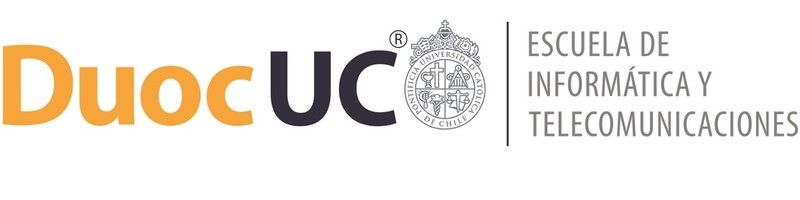

# **Informe Notebook** Proyecto: Cerveceria casera en el mercado chileno

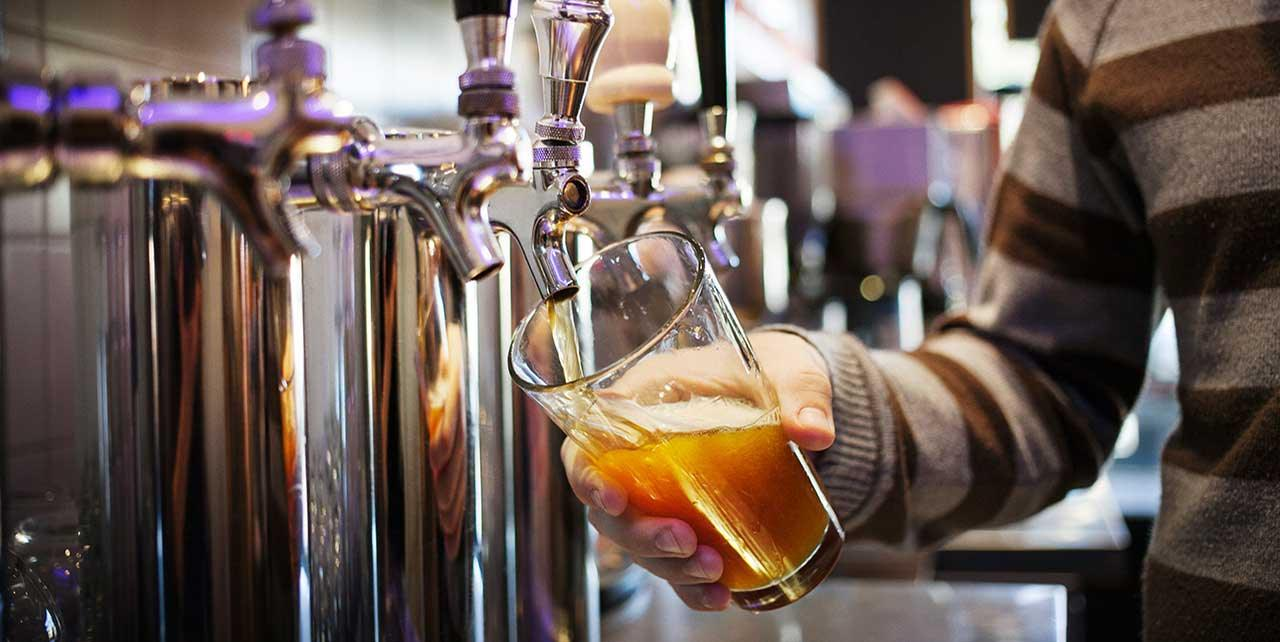

# Contexto del caso:


**En el rubro de la creación de cervezas cada vez es más conocido el tema de las cervezas casera, estas durante estos últimos años han aumentado en popularidad debido a lo innovador de sus sabores, por eso cerveceras grandes de renombre como Kross quieren tener una parte de ese negocio haciendo ellos sus propios sabores innovadores, para ello la empresa Kross nos pidió a nosotros como grupo DJJ que analicemos un csv con muestras de cervezas caseras estadounidenses para que veamos cuales fueron las mejores valoradas para integrarlas en el mercado chileno.**

## Fase 1: Comprender Negocio

**Nuestro objetivo como grupo es analizar los datos de las cervezas estadounidenses para poder ver cuáles fueron las mejores calificadas, para esto ocuparemos diferentes métodos y gráficos para sacar en claro todo los datos necesarios.**



además de responder las siguientes preguntas

¿Cuáles son los tipos de cerveza mejor evaluados?

¿Cuáles son las cervezas con mejor sabor valorado?

¿Cuál de las cervezas tiene más reviews dentro de los datos?



# Importar librerias y el CSV

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
file_path = 'C:/Users/massr/Desktop/reviewsCerveceriaKedro/cerveceriar/data/01_raw/beer_reviews.csv'
df = pd.read_csv(file_path, sep=",")


# Fase 2: Comprender los datos del CSV

Ahora que tenemos el csv cargado veremos la cantidad de datos y columnas además de analizar los datos que más se nos hagan útiles para el proyecto

In [4]:
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [ ]:
df.shape

(1586614, 13)

In [ ]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [ ]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


#Ver los datos que nos resulten más interesantes

In [ ]:
df.brewery_name

,brewery_name
0,Vecchio Birraio
1,Vecchio Birraio
2,Vecchio Birraio
3,Vecchio Birraio
4,Caldera Brewing Company
...,...
1586609,The Defiant Brewing Company
1586610,The Defiant Brewing Company
1586611,The Defiant Brewing Company
1586612,The Defiant Brewing Company


In [ ]:
df.beer_name

,beer_name
0,Sausa Weizen
1,Red Moon
2,Black Horse Black Beer
3,Sausa Pils
4,Cauldron DIPA
...,...
1586609,The Horseman's Ale
1586610,The Horseman's Ale
1586611,The Horseman's Ale
1586612,The Horseman's Ale


In [ ]:
df.review_palate

,review_palate
0,1.5
1,3.0
2,3.0
3,2.5
4,4.0
...,...
1586609,4.0
1586610,2.0
1586611,3.5
1586612,4.5


In [ ]:
df.review_overall

,review_overall
0,1.5
1,3.0
2,3.0
3,3.0
4,4.0
...,...
1586609,5.0
1586610,4.0
1586611,4.5
1586612,4.0


In [ ]:
df.review_taste

,review_taste
0,1.5
1,3.0
2,3.0
3,3.0
4,4.5
...,...
1586609,4.0
1586610,4.0
1586611,4.0
1586612,4.5


In [ ]:
df.review_appearance

,review_appearance
0,2.5
1,3.0
2,3.0
3,3.5
4,4.0
...,...
1586609,3.5
1586610,2.5
1586611,3.0
1586612,4.5


In [ ]:
df.beer_abv

,beer_abv
0,5.0
1,6.2
2,6.5
3,5.0
4,7.7
...,...
1586609,5.2
1586610,5.2
1586611,5.2
1586612,5.2


#Empezaremos con la graficación y análisis de los datos

En esta parte del proyecto nos encargamos de ver bien los datos que consideramos más factibles a tomar en este proyecto, en relación a las preguntas que planteamos en la parte 1.



<Axes: xlabel='review_overall', ylabel='Density'>

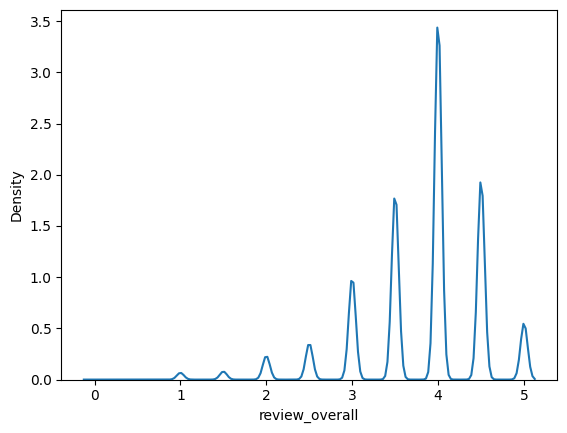

In [ ]:
from seaborn import kdeplot
kdeplot(df.review_overall)

<Axes: xlabel='review_taste', ylabel='Density'>

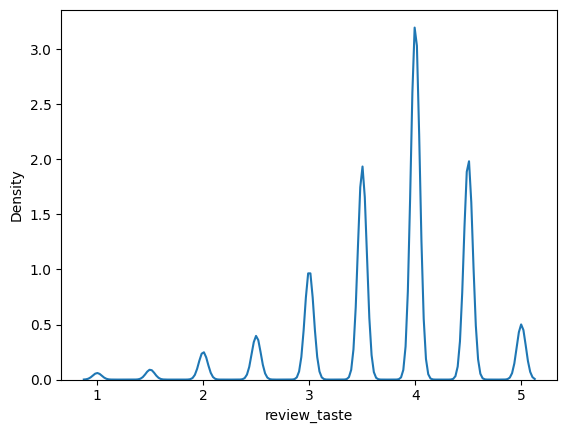

In [ ]:
from seaborn import kdeplot
kdeplot(df.review_taste)

<Axes: xlabel='review_appearance', ylabel='Density'>

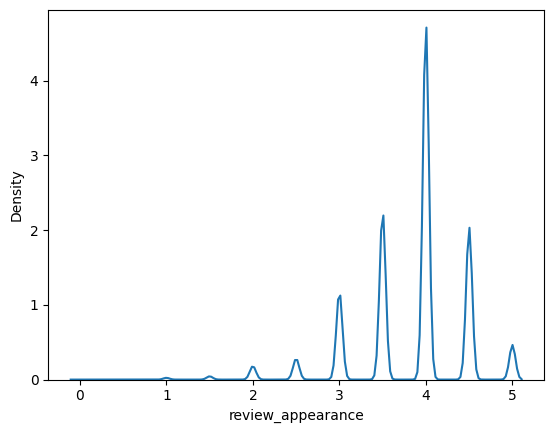

In [ ]:
from seaborn import kdeplot
kdeplot(df.review_appearance)

<Axes: xlabel='review_palate', ylabel='Density'>

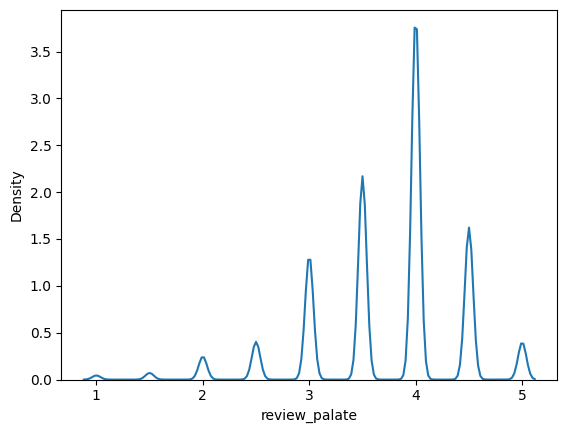

In [ ]:
from seaborn import kdeplot
kdeplot(df.review_palate)

En los siguientes gráficos intentamos ver a más detalle la distribución de los anteriores datos que graficamos.


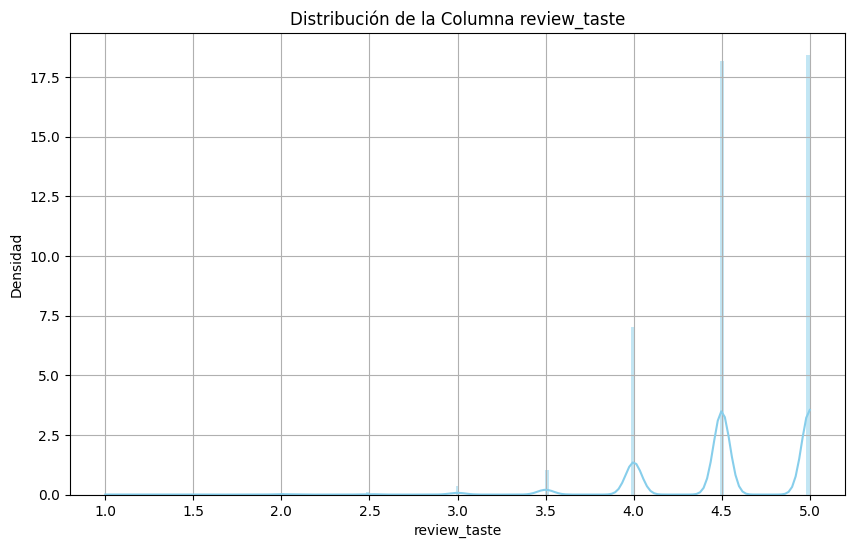

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer la columna de interés
data = df['review_taste']

# Crear el histograma con una distribución normal superpuesta
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", linewidth=0, color='skyblue')
plt.title('Distribución de la Columna review_taste')
plt.xlabel('review_taste')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

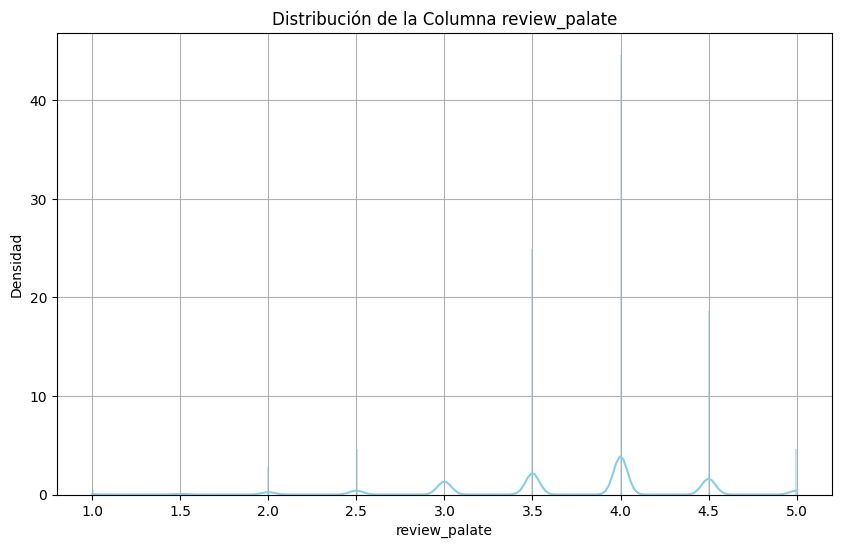

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer la columna de interés
data = df['review_palate']

# Crear el histograma con una distribución normal superpuesta
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", linewidth=0, color='skyblue')
plt.title('Distribución de la Columna review_palate')
plt.xlabel('review_palate')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

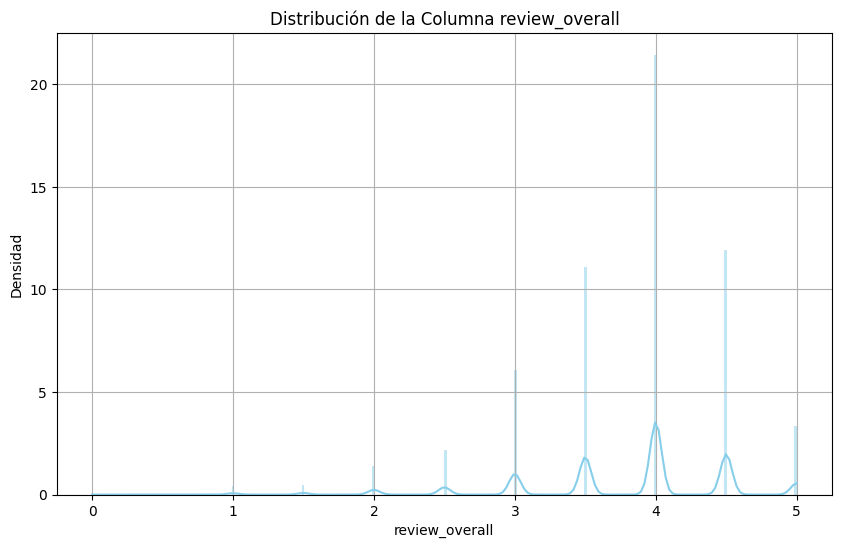

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer la columna de interés
data = df['review_overall']

# Crear el histograma con una distribución normal superpuesta
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", linewidth=0, color='skyblue')
plt.title('Distribución de la Columna review_overall')
plt.xlabel('review_overall')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

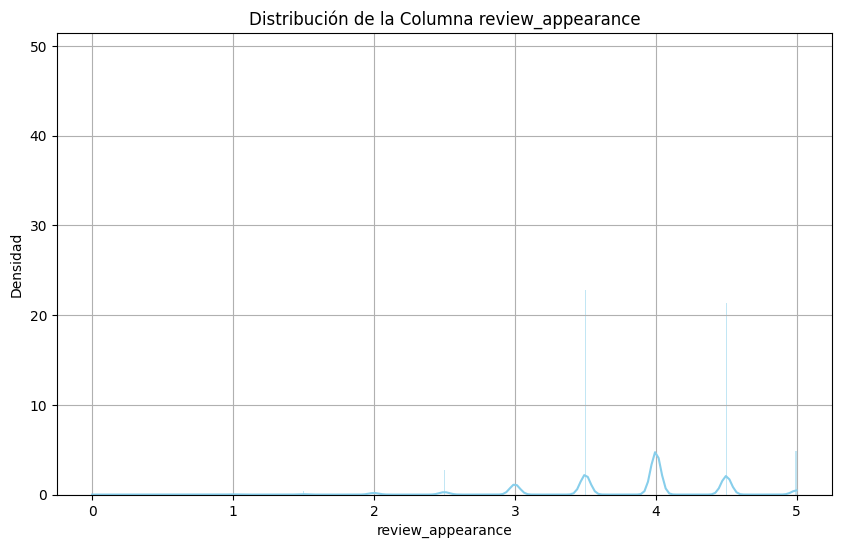

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer la columna de interés
data = df['review_appearance']

# Crear el histograma con una distribución normal superpuesta
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", linewidth=0, color='skyblue')
plt.title('Distribución de la Columna review_appearance')
plt.xlabel('review_appearance')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# Datos de tendencia central
en esta parte con la información que graficamos anteriormente no era suficiente así que queríamos tener a detalle de la media, moda y medina de los datos ya analizados


In [ ]:
#Codigo que analiza la media, mediana y moda de los datos
import pandas as pd
from scipy import stats


# codigo que ayuda a calcular la media de las rewies
media = df['review_overall'].mean()
print(f'Media: {media}')

# Codigo que ayuda a calcular la mediana de las rewies
mediana = df['review_overall'].median()
print(f'Mediana: {mediana}')

# Codigo que se usa para medir la moda de las rewies
moda = df['review_overall'].mode()
print(f'Moda: {moda.values}')

# Estadísticas descriptivas adicionales
estadisticas = df['review_overall'].describe()
print('\nEstadísticas descriptivas:')
print(estadisticas)

Media: 3.823937521649968
Mediana: 4.0
Moda: [4.]

Estadísticas descriptivas:
count    1.518478e+06
mean     3.823938e+00
std      7.172663e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64


In [ ]:
#Codigo que analiza la media, mediana y moda de los datos
import pandas as pd
from scipy import stats


# codigo que ayuda a calcular la media del sabor
media = df['review_taste'].mean()
print(f'Media: {media}')

# Codigo que ayuda a calcular la mediana del sabor
mediana = df['review_taste'].median()
print(f'Mediana: {mediana}')

# Codigo que se usa para medir la moda del sabor
moda = df['review_taste'].mode()
print(f'Moda: {moda.values}')

# Estadísticas descriptivas adicionales
estadisticas = df['review_taste'].describe()
print('\nEstadísticas descriptivas:')
print(estadisticas)

Media: 3.8040821138007925
Mediana: 4.0
Moda: [4.]

Estadísticas descriptivas:
count    1.518478e+06
mean     3.804082e+00
std      7.286079e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_taste, dtype: float64


In [ ]:
#Codigo que analiza la media, mediana y moda de los datos
import pandas as pd
from scipy import stats


# codigo que ayuda a calcular la media de la apariencia
media = df['review_appearance'].mean()
print(f'Media: {media}')

# Codigo que ayuda a calcular la mediana de la apariencia
mediana = df['review_appearance'].median()
print(f'Mediana: {mediana}')

# Codigo que se usa para medir la moda de la apariencia
moda = df['review_appearance'].mode()
print(f'Moda: {moda.values}')

# Estadísticas descriptivas adicionales
estadisticas = df['review_appearance'].describe()
print('\nEstadísticas descriptivas:')
print(estadisticas)

Media: 3.8503830809534283
Mediana: 4.0
Moda: [4.]

Estadísticas descriptivas:
count    1.518478e+06
mean     3.850383e+00
std      6.143106e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_appearance, dtype: float64


In [ ]:
#Codigo que analiza la media, mediana y moda de los datos
import pandas as pd
from scipy import stats


# codigo que ayuda a calcular la media de la apariencia
media = df['review_palate'].mean()
print(f'Media: {media}')

# Codigo que ayuda a calcular la mediana de la apariencia
mediana = df['review_palate'].median()
print(f'Mediana: {mediana}')

# Codigo que se usa para medir la moda de la apariencia
moda = df['review_palate'].mode()
print(f'Moda: {moda.values}')

# Estadísticas descriptivas adicionales
estadisticas = df['review_palate'].describe()
print('\nEstadísticas descriptivas:')
print(estadisticas)

Media: 3.753734660627286
Mediana: 4.0
Moda: [4.]

Estadísticas descriptivas:
count    1.518478e+06
mean     3.753735e+00
std      6.793350e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_palate, dtype: float64


# Gráfico de dispersión
En esta parte del proyecto tomamos los datos que analizamos anteriormente y los graficamos de tal forma que podamos ver cuales son los datos que destacan del resto.


Varianza de X: 0.519295876714356
Desviación estándar de X: 0.7206218680517238
Varianza de Y: 0.5357795098053175
Desviación estándar de Y: 0.7319696098919117


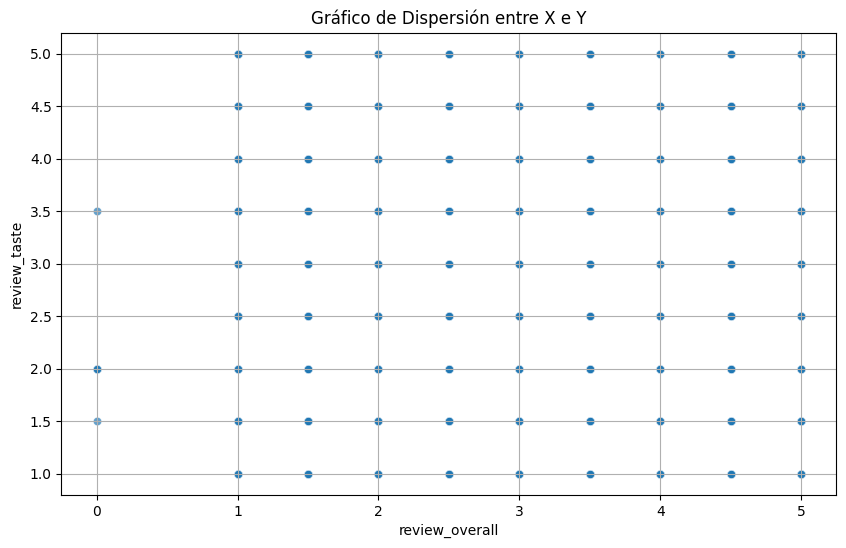

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

varianza_x = df['review_overall'].var()
desviacion_x = df['review_overall'].std()

varianza_y = df['review_taste'].var()
desviacion_y = df['review_taste'].std()

print(f'Varianza de X: {varianza_x}')
print(f'Desviación estándar de X: {desviacion_x}')
print(f'Varianza de Y: {varianza_y}')
print(f'Desviación estándar de Y: {desviacion_y}')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_overall', y='review_taste', data=df, alpha=0.7)
plt.title('Gráfico de Dispersión entre X e Y')
plt.xlabel('review_overall')
plt.ylabel('review_taste')
plt.grid(True)
plt.show()

Varianza de X: 5859025964738176.0
Desviación estándar de X: 76544274.53923759
Varianza de Y: 0.519295876714356
Desviación estándar de Y: 0.7206218680517238


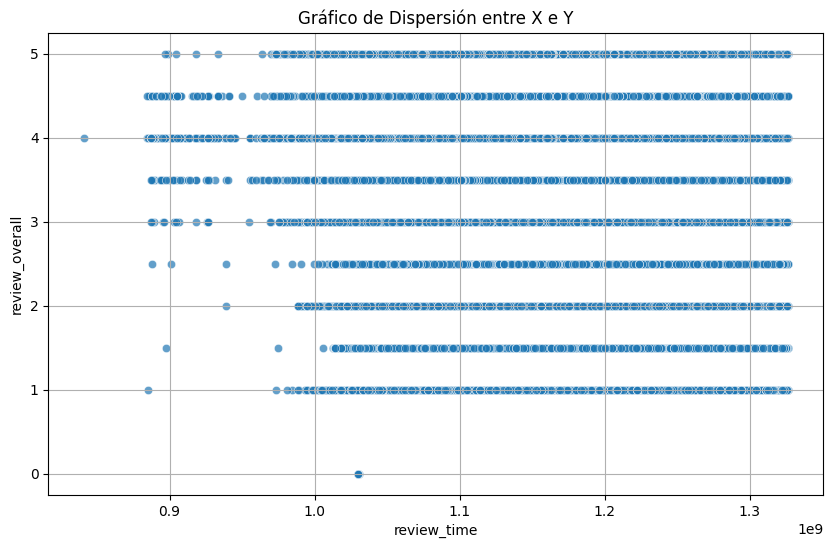

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

varianza_x = df['review_time'].var()
desviacion_x = df['review_time'].std()

varianza_y = df['review_overall'].var()
desviacion_y = df['review_overall'].std()

print(f'Varianza de X: {varianza_x}')
print(f'Desviación estándar de X: {desviacion_x}')
print(f'Varianza de Y: {varianza_y}')
print(f'Desviación estándar de Y: {desviacion_y}')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_time', y='review_overall', data=df, alpha=0.7)
plt.title('Gráfico de Dispersión entre X e Y')
plt.xlabel('review_time')
plt.ylabel('review_overall')
plt.grid(True)
plt.show()

Varianza de X: 5859025964738176.0
Desviación estándar de X: 76544274.53923759
Varianza de Y: 0.5357795098053175
Desviación estándar de Y: 0.7319696098919117


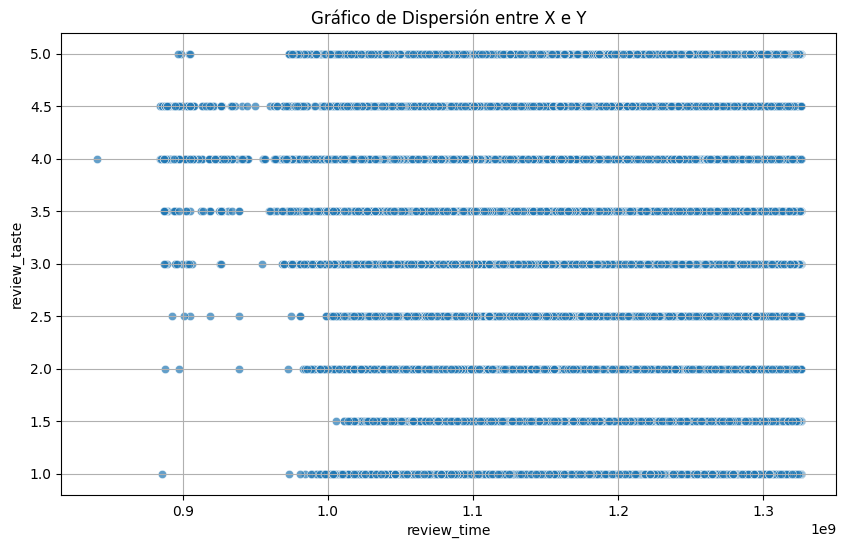

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

varianza_x = df['review_time'].var()
desviacion_x = df['review_time'].std()

varianza_y = df['review_taste'].var()
desviacion_y = df['review_taste'].std()

print(f'Varianza de X: {varianza_x}')
print(f'Desviación estándar de X: {desviacion_x}')
print(f'Varianza de Y: {varianza_y}')
print(f'Desviación estándar de Y: {desviacion_y}')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_time', y='review_taste', data=df, alpha=0.7)
plt.title('Gráfico de Dispersión entre X e Y')
plt.xlabel('review_time')
plt.ylabel('review_taste')
plt.grid(True)
plt.show()

Varianza de X: 5859025964738176.0
Desviación estándar de X: 76544274.53923759
Varianza de Y: 0.3795702998810948
Desviación estándar de Y: 0.6160927688920678


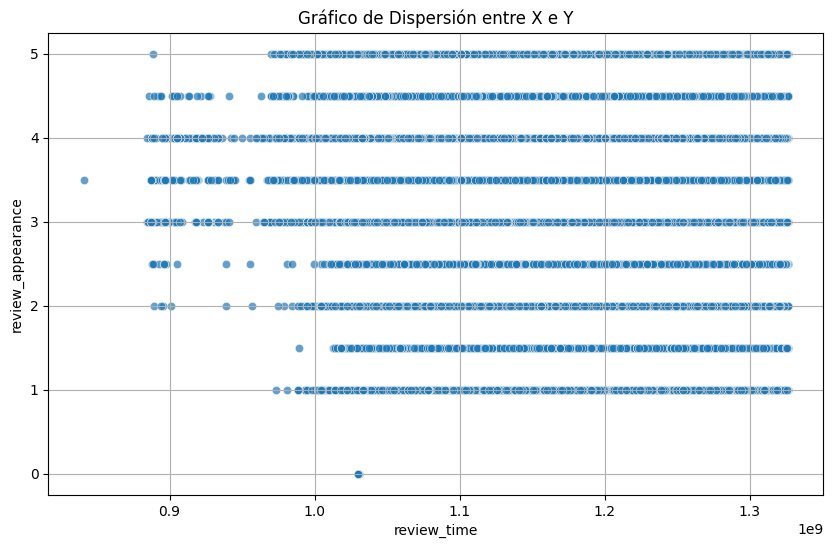

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

varianza_x = df['review_time'].var()
desviacion_x = df['review_time'].std()

varianza_y = df['review_appearance'].var()
desviacion_y = df['review_appearance'].std()

print(f'Varianza de X: {varianza_x}')
print(f'Desviación estándar de X: {desviacion_x}')
print(f'Varianza de Y: {varianza_y}')
print(f'Desviación estándar de Y: {desviacion_y}')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_time', y='review_appearance', data=df, alpha=0.7)
plt.title('Gráfico de Dispersión entre X e Y')
plt.xlabel('review_time')
plt.ylabel('review_appearance')
plt.grid(True)
plt.show()

Varianza de X: 5859025964738176.0
Desviación estándar de X: 76544274.53923759
Varianza de Y: 0.4654218953246297
Desviación estándar de Y: 0.6822183633739491


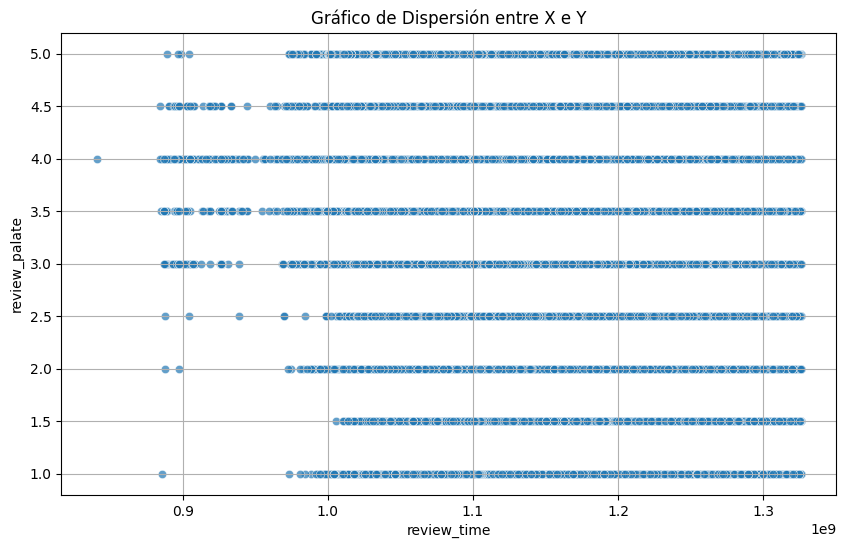

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

varianza_x = df['review_time'].var()
desviacion_x = df['review_time'].std()

varianza_y = df['review_palate'].var()
desviacion_y = df['review_palate'].std()

print(f'Varianza de X: {varianza_x}')
print(f'Desviación estándar de X: {desviacion_x}')
print(f'Varianza de Y: {varianza_y}')
print(f'Desviación estándar de Y: {desviacion_y}')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_time', y='review_palate', data=df, alpha=0.7)
plt.title('Gráfico de Dispersión entre X e Y')
plt.xlabel('review_time')
plt.ylabel('review_palate')
plt.grid(True)
plt.show()

# Fase 3: Preparar los datos

En esta etapa del proyecto nos dedicaremos como grupo a preparar los datos de mejor forma para poder tener solo los mejores.

Eliminamos los dato que sean nulos del CSV

In [ ]:
df = df.dropna()

# Tratamiento de datos Outliers
Para esta sección de la preparación del dataset tomamos los datos para eliminar los que sean Outliers. Utilizamos un tratamiento basado en el método IQR para los valores atípicos.


Datos originales:
   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          For

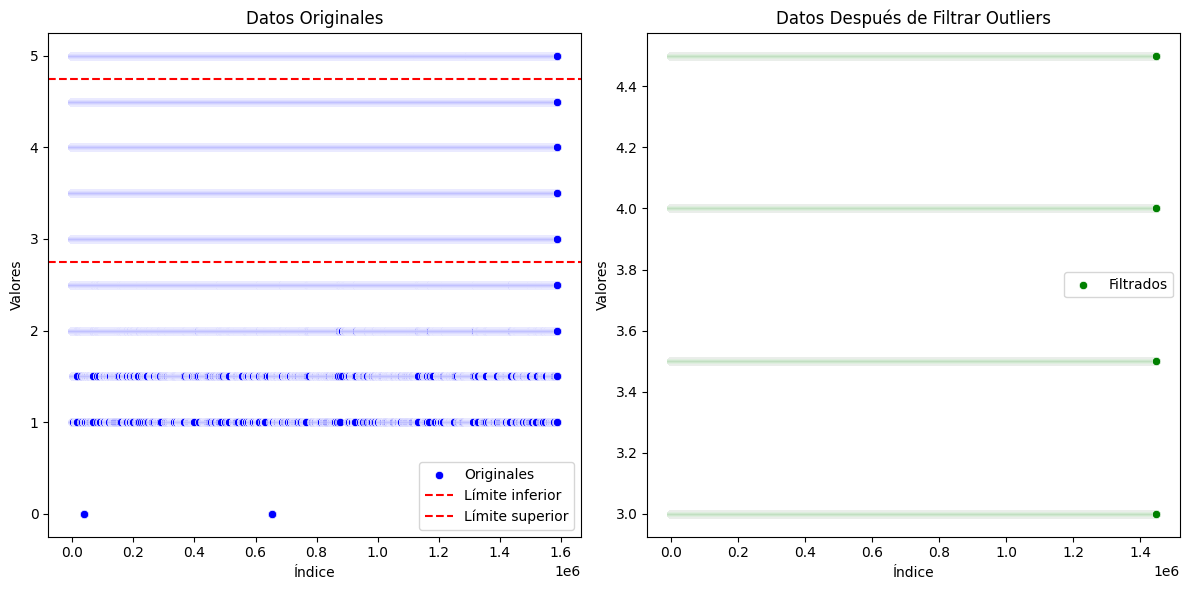

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Muestra las primeras filas del dataframe para verificar su contenido
print("Datos originales:")
print(df.head())


data = df['review_appearance']

# Calcular los cuartiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los valores válidos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Crear un nuevo DataFrame con los datos sin los outliers
filtered_df = df[(df['review_appearance'] >= lower_bound) & (df['review_appearance'] <= upper_bound)]

# Crear gráficos de dispersión con los datos
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de datos originales
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(len(data)), y=data, color='blue', label='Originales')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Límite inferior')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Límite superior')
plt.title('Datos Originales')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

# Gráfico de dispersión de datos filtrados
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.arange(len(filtered_data)), y=filtered_data, color='green', label='Filtrados')
plt.title('Datos Después de Filtrar Outliers')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

plt.tight_layout()
plt.show()

Datos originales:
   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          For

<ipython-input-5-ed0f88e1cca0>:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


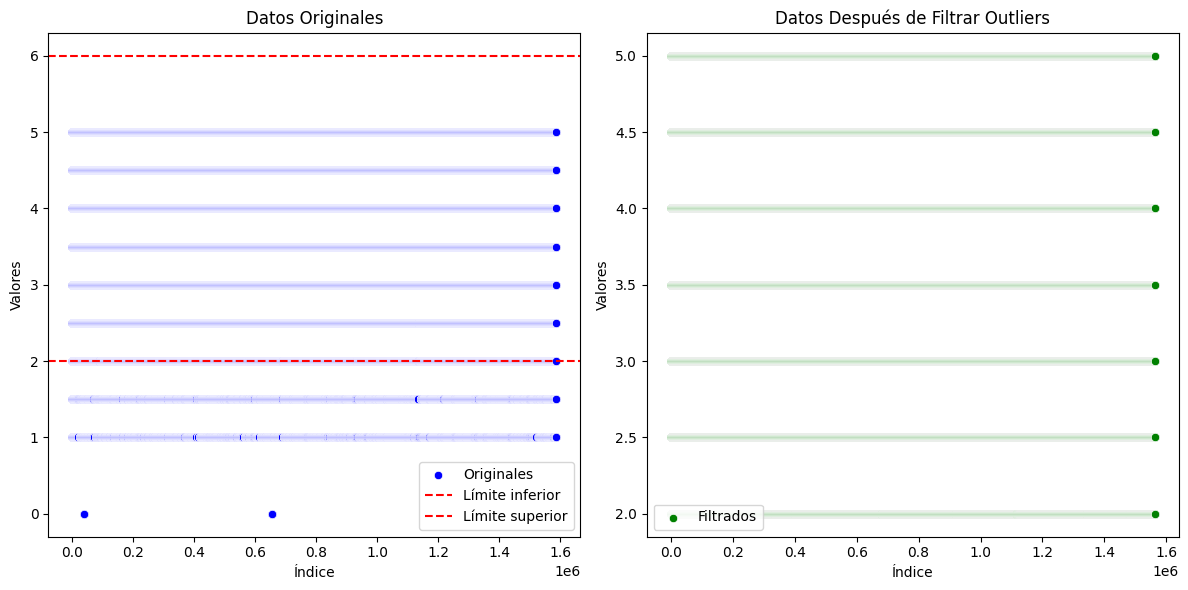

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Muestra las primeras filas del dataframe para verificar su contenido
print("Datos originales:")
print(df.head())


data = df['review_overall']

# Calcular los cuartiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los valores válidos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Crear un nuevo DataFrame con los datos sin outliers
filtered_df = df[(df['review_overall'] >= lower_bound) & (df['review_overall'] <= upper_bound)]

# Crear gráficos de dispersión
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de datos originales
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(len(data)), y=data, color='blue', label='Originales')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Límite inferior')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Límite superior')
plt.title('Datos Originales')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

# Gráfico de dispersión de datos filtrados
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.arange(len(filtered_data)), y=filtered_data, color='green', label='Filtrados')
plt.title('Datos Después de Filtrar Outliers')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

plt.tight_layout()
plt.show()

Datos originales:
   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          For

<ipython-input-6-bfcfc29ecf64>:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


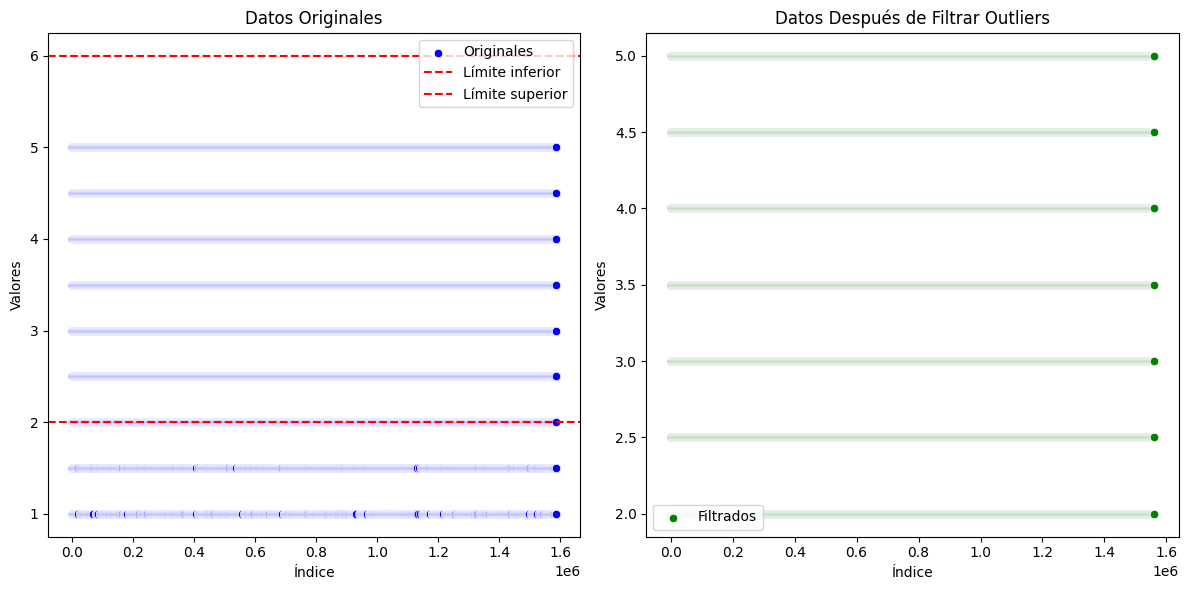

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Muestra las primeras filas del dataframe para verificar su contenido
print("Datos originales:")
print(df.head())


data = df['review_taste']

# Calcular los cuartiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los valores válidos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Crear un nuevo DataFrame con los datos sin outliers
filtered_df = df[(df['review_taste'] >= lower_bound) & (df['review_taste'] <= upper_bound)]

# Crear gráficos de dispersión
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de datos originales
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(len(data)), y=data, color='blue', label='Originales')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Límite inferior')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Límite superior')
plt.title('Datos Originales')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

# Gráfico de dispersión de datos filtrados
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.arange(len(filtered_data)), y=filtered_data, color='green', label='Filtrados')
plt.title('Datos Después de Filtrar Outliers')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

plt.tight_layout()
plt.show()

Datos originales:
   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          For

<ipython-input-8-1669139c0cfb>:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


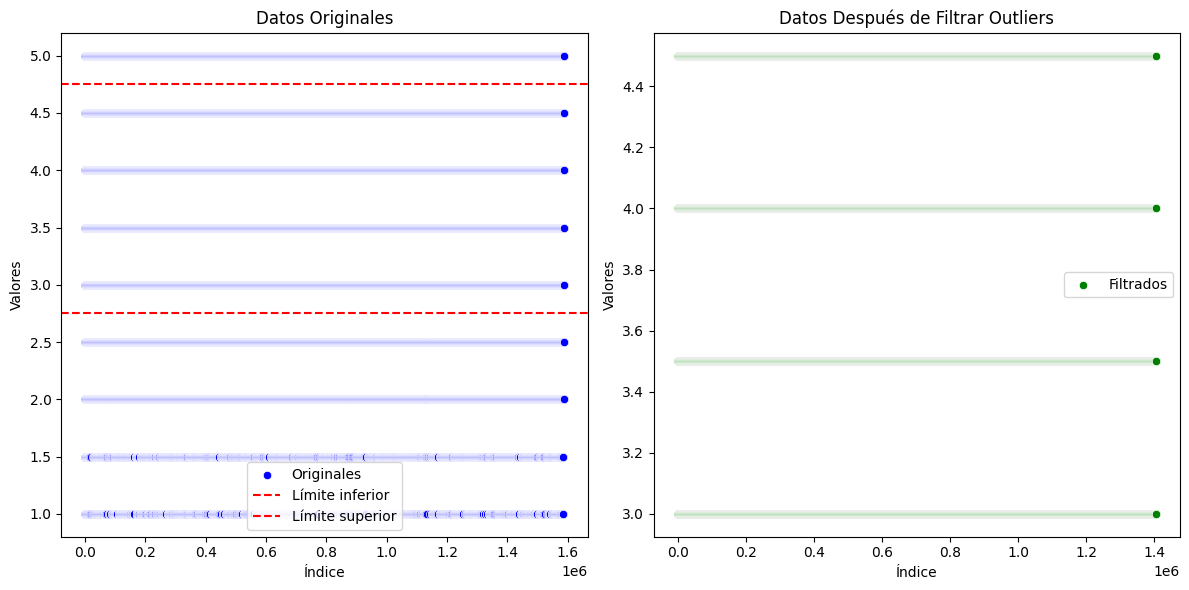

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Muestra las primeras filas del dataframe para verificar su contenido
print("Datos originales:")
print(df.head())


data = df['review_palate']

# Calcular los cuartiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los valores válidos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Crear un nuevo DataFrame con los datos sin outliers
filtered_df = df[(df['review_palate'] >= lower_bound) & (df['review_palate'] <= upper_bound)]

# Crear gráficos de dispersión
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de datos originales
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(len(data)), y=data, color='blue', label='Originales')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Límite inferior')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Límite superior')
plt.title('Datos Originales')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

# Gráfico de dispersión de datos filtrados
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.arange(len(filtered_data)), y=filtered_data, color='green', label='Filtrados')
plt.title('Datos Después de Filtrar Outliers')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

plt.tight_layout()
plt.show()

Graficamos mediante mapas de calor para ver que datos es tan correlacionados y cuales no

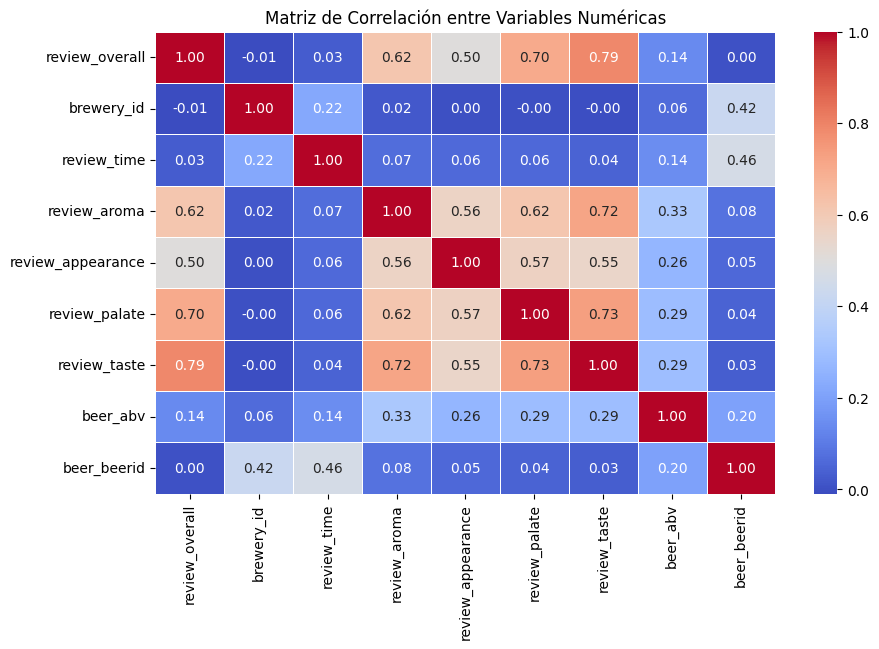

In [10]:
# Importar las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para la correlación
numeric_columns = ['review_overall','brewery_id', 'review_time','review_aroma', 'review_appearance','review_palate', 'review_taste', 'beer_abv','beer_beerid']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Crear la matriz de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

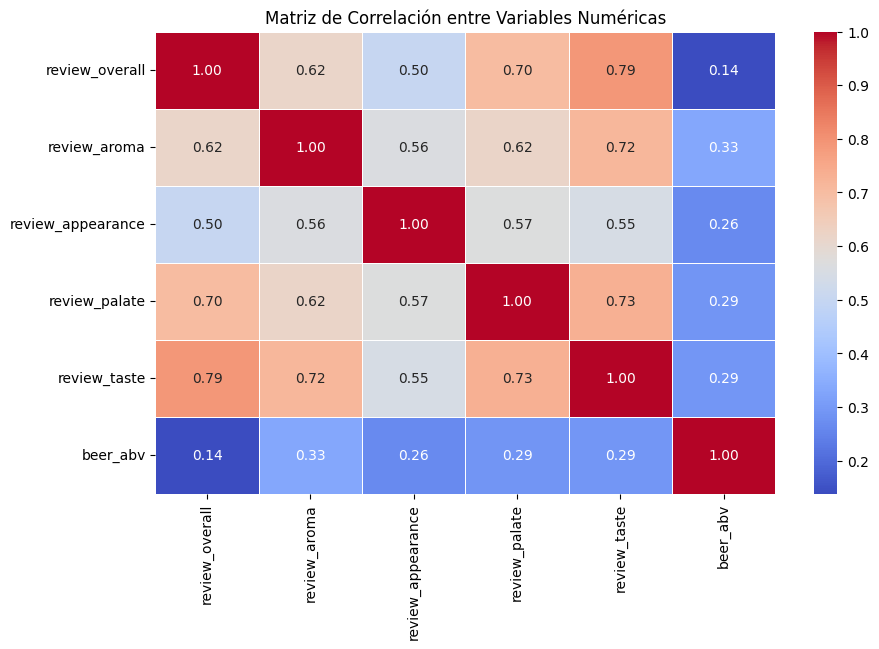

In [11]:
# Importar las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para la correlación
numeric_columns = [ 'review_overall','review_aroma', 'review_appearance',
                   'review_palate', 'review_taste', 'beer_abv']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Crear la matriz de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

Eliminamos review_profilename ya que para nosotros como equipo no es necesario para el futuro del proyecto.

In [ ]:
df = df.dropna()
df.columns
df2=df.drop(["review_profilename"], axis=1, inplace=True)

<ipython-input-17-87308cb267f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2=df.drop(["review_profilename"], axis=1, inplace=True)


In [ ]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'beer_style', 'review_palate',
       'review_taste', 'beer_name', 'beer_abv', 'beer_beerid'],
      dtype='object')

#Filtración de datos
En esta parte tomamos como dato principal el de review_overall para filtrar los datos de las cerveza y así responder a la pregunta de cuál de las cervezas es la mejor.


En este filtrado de datos solo tomamos en cuenta los datos que sean mayor o igual a 4.5 dejándonos con un total de 403.000 datos lo cual es bastante.

In [ ]:
# Filtrar las filas donde 'review_overall' es mayor o igual a 4.5
filtered_df = df[df['review_overall'] >= 4.5]

In [ ]:
filtered_df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
11,1075,Caldera Brewing Company,1283154365,5.0,5.0,4.0,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
19,1075,Caldera Brewing Company,1325478004,4.5,4.5,3.0,Rauchbier,4.0,4.5,Rauch Ür Bock,7.4,58046
22,1075,Caldera Brewing Company,1320494397,4.5,5.0,4.5,Rauchbier,4.0,4.5,Rauch Ür Bock,7.4,58046
24,1075,Caldera Brewing Company,1319847514,4.5,4.5,4.0,Rauchbier,4.0,4.5,Rauch Ür Bock,7.4,58046
...,...,...,...,...,...,...,...,...,...,...,...,...
1586606,14359,The Defiant Brewing Company,1162871808,5.0,4.5,4.0,Pumpkin Ale,5.0,5.0,The Horseman's Ale,5.2,33061
1586607,14359,The Defiant Brewing Company,1162865640,5.0,5.0,4.5,Pumpkin Ale,5.0,4.5,The Horseman's Ale,5.2,33061
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061


Para el segundo filtrado de los datos tomamos en cuenta sólo los datos que sean mayor o igual a 5.0, ya que queríamos ver cuales eran las mejores cervezas que estaban clasificadas en los datos.


In [ ]:
# Filtrar las filas donde 'review_overall' es mayor o igual a 5
filtered_df_2 = df[df['review_overall'] >=5.0]

In [ ]:
filtered_df_2

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,1075,Caldera Brewing Company,1283154365,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
1,1075,Caldera Brewing Company,1318802642,5.0,5.0,3.5,optimator13,Rauchbier,3.5,5.0,Rauch Ür Bock,7.4,58046
2,1075,Caldera Brewing Company,1315014054,5.0,4.5,4.0,Bung,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046
3,1075,Caldera Brewing Company,1305926255,5.0,4.5,3.5,Deuane,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046
4,1075,Caldera Brewing Company,1246913078,5.0,4.0,4.5,GratefulBeerGuy,American Pale Ale (APA),4.5,4.0,Caldera Pale Ale,5.5,25414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91315,14359,The Defiant Brewing Company,1163291143,5.0,5.0,5.0,NyackNicky,Pumpkin Ale,5.0,5.0,The Horseman's Ale,5.2,33061
91316,14359,The Defiant Brewing Company,1162871808,5.0,4.5,4.0,blitheringidiot,Pumpkin Ale,5.0,5.0,The Horseman's Ale,5.2,33061
91317,14359,The Defiant Brewing Company,1162865640,5.0,5.0,4.5,PopeDX,Pumpkin Ale,5.0,4.5,The Horseman's Ale,5.2,33061
91318,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061


#CSV de la segunda filtración de datos.
En esta parte descargamos los datos de la segunda filtración de datos para poder ocupar en un futuro si es necesario.


In [ ]:
# Guardar el DataFrame filtrado en un nuevo archivo CSV
filtered_df_2.to_csv('filtered_review_overall_2.csv', index=False)

In [ ]:
# Descargar el archivo CSV filtrado
files.download('filtered_review_overall_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Gráficos de los datos filtrados

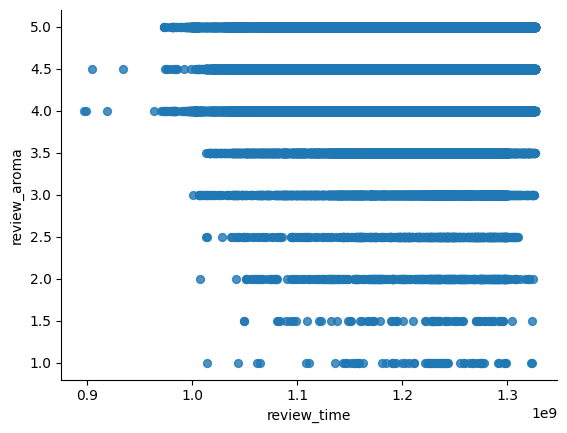

In [ ]:
# @title review_time vs review_aroma

from matplotlib import pyplot as plt
filtered_df_2.plot(kind='scatter', x='review_time', y='review_aroma', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

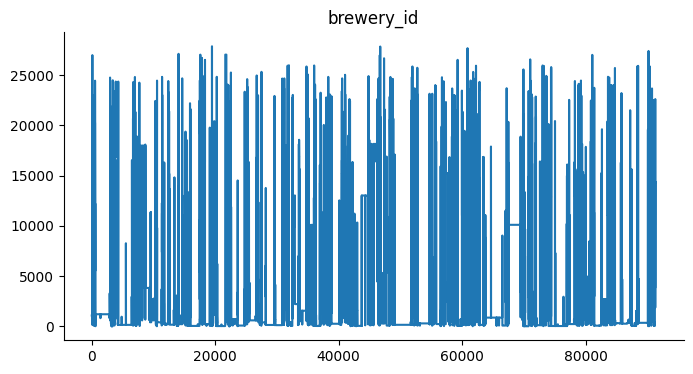

In [ ]:
# @title brewery_id

from matplotlib import pyplot as plt
filtered_df_2['brewery_id'].plot(kind='line', figsize=(8, 4), title='brewery_id')
plt.gca().spines[['top', 'right']].set_visible(False)

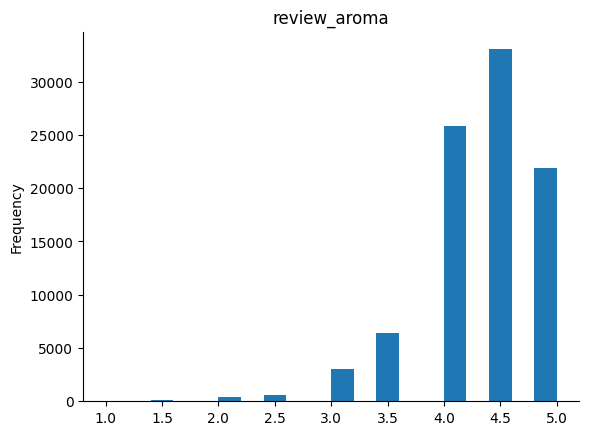

In [ ]:
# @title review_aroma

from matplotlib import pyplot as plt
filtered_df_2['review_aroma'].plot(kind='hist', bins=20, title='review_aroma')
plt.gca().spines[['top', 'right',]].set_visible(False)

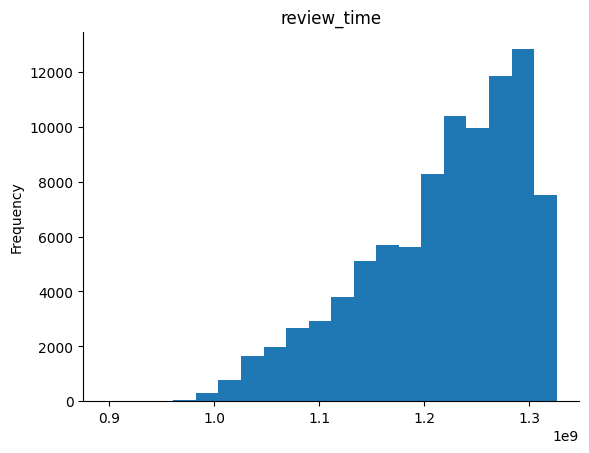

In [ ]:
# @title review_time

from matplotlib import pyplot as plt
filtered_df_2['review_time'].plot(kind='hist', bins=20, title='review_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Resumen de la primera parte del proyecto

En este dataset tomamos los datos de la cervezeria Kross para poder hacer un analisis de mercado. mientras observavamos los datos pudimos encontrar que hay varios factores que pueden influenciar en la clasificacion de una cerveza entre las variables que mas influyen son el sabor,aroma,paladar y apariencia, estas 4 variables son las que mas afectan las calificaciones. Con estos datos podemos tomar y seleccionar las mejores cervezas para lanzar al mercado chileno sin sufrir perdidas por posibles productos defectuosos.

# Fase 4: modelar los datos